In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure


# EDA(EXPLORATORY DATA ANALYSIS)

In [2]:
data = pd.read_csv('crime.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [5]:
columns = data[['Primary Type', 'Location Description', 'Arrest', 'Domestic', 'Year']]
columns.head()


,Primary Type,Location Description,Arrest,Domestic,Year
0,BATTERY,APARTMENT,True,True,2016
1,BATTERY,RESIDENCE,False,True,2016
2,PUBLIC PEACE VIOLATION,STREET,False,False,2016
3,BATTERY,SIDEWALK,False,False,2016
4,THEFT,RESIDENCE,False,True,2016


In [6]:
primary_type = data['Primary Type'].value_counts()
print(primary_type)

THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING                      

In [7]:
data.shape

(1456714, 23)

In [8]:
data["Primary Type"].value_counts().describe()


count        33.000000
mean      44142.848485
std       77885.846405
min           4.000000
25%         662.000000
50%        6195.000000
75%       61138.000000
max      329460.000000
Name: Primary Type, dtype: float64

<Axes: xlabel='count', ylabel='Primary Type'>

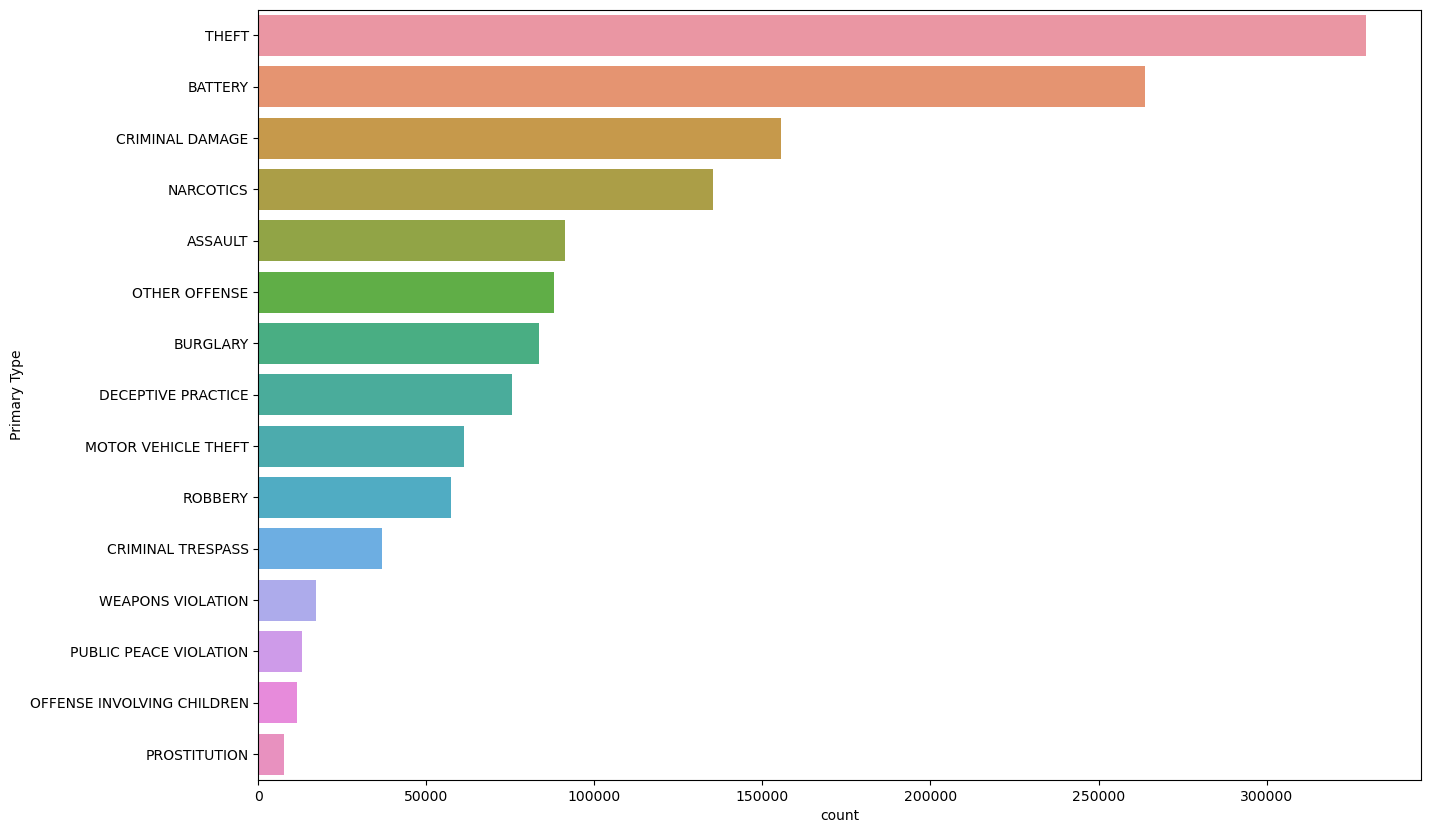

In [9]:
order_df = data['Primary Type'].value_counts().iloc[:15].index
plt.figure(figsize = (15,10))
sns.countplot(y = 'Primary Type', data = data, order = order_df)



In [10]:
data.value_counts("Location Description")

Location Description
STREET                   330471
RESIDENCE                233530
APARTMENT                185023
SIDEWALK                 160891
OTHER                     55774
                          ...  
GARAGE/AUTO REPAIR            1
CLUB                          1
CTA "L" PLATFORM              1
CTA "L" TRAIN                 1
EXPRESSWAY EMBANKMENT         1
Length: 142, dtype: int64

In [11]:
duplicates = data[data.duplicated()]
print("Duplicated Values in the data set ", duplicates.shape[0])

Duplicated Values in the data set  0


In [12]:
for col in data.dtypes.index:
    if data[col].dtype=='object':
        print('\n Total unique value in the colums {} is \n'.format(col),data[col])


 Total unique value in the colums Case Number is 
 0          HZ250496
1          HZ250409
2          HZ250503
3          HZ250424
4          HZ250455
             ...   
1456709    HZ250507
1456710    HZ250491
1456711    HZ250479
1456712    HZ250370
1456713    HZ250517
Name: Case Number, Length: 1456714, dtype: object

 Total unique value in the colums Date is 
 0          05/03/2016 11:40:00 PM
1          05/03/2016 09:40:00 PM
2          05/03/2016 11:31:00 PM
3          05/03/2016 10:10:00 PM
4          05/03/2016 10:00:00 PM
                    ...          
1456709    05/03/2016 11:33:00 PM
1456710    05/03/2016 11:30:00 PM
1456711    05/03/2016 12:15:00 AM
1456712    05/03/2016 09:07:00 PM
1456713    05/03/2016 11:38:00 PM
Name: Date, Length: 1456714, dtype: object

 Total unique value in the colums Block is 
 0            013XX S SAWYER AVE
1            061XX S DREXEL AVE
2           053XX W CHICAGO AVE
3             049XX W FULTON ST
4             003XX N LOTUS AVE
          

C:\Users\hamma\AppData\Local\Temp\ipykernel_1968\1177337934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


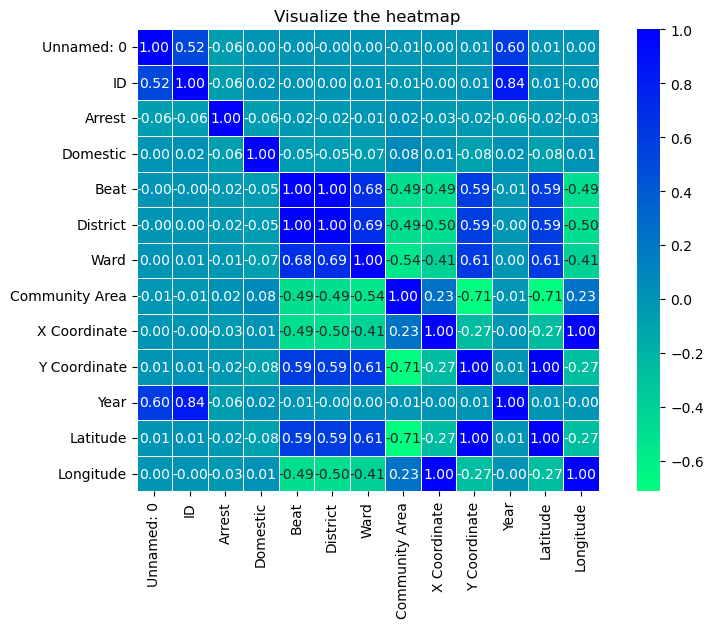

In [13]:
corr = data.corr()
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='winter_r',fmt='.2f',
           square=True,
           linewidths=.5,ax=ax)
plt.title("Visualize the heatmap")
plt.show()

C:\Users\hamma\AppData\Local\Temp\ipykernel_1968\3933649895.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


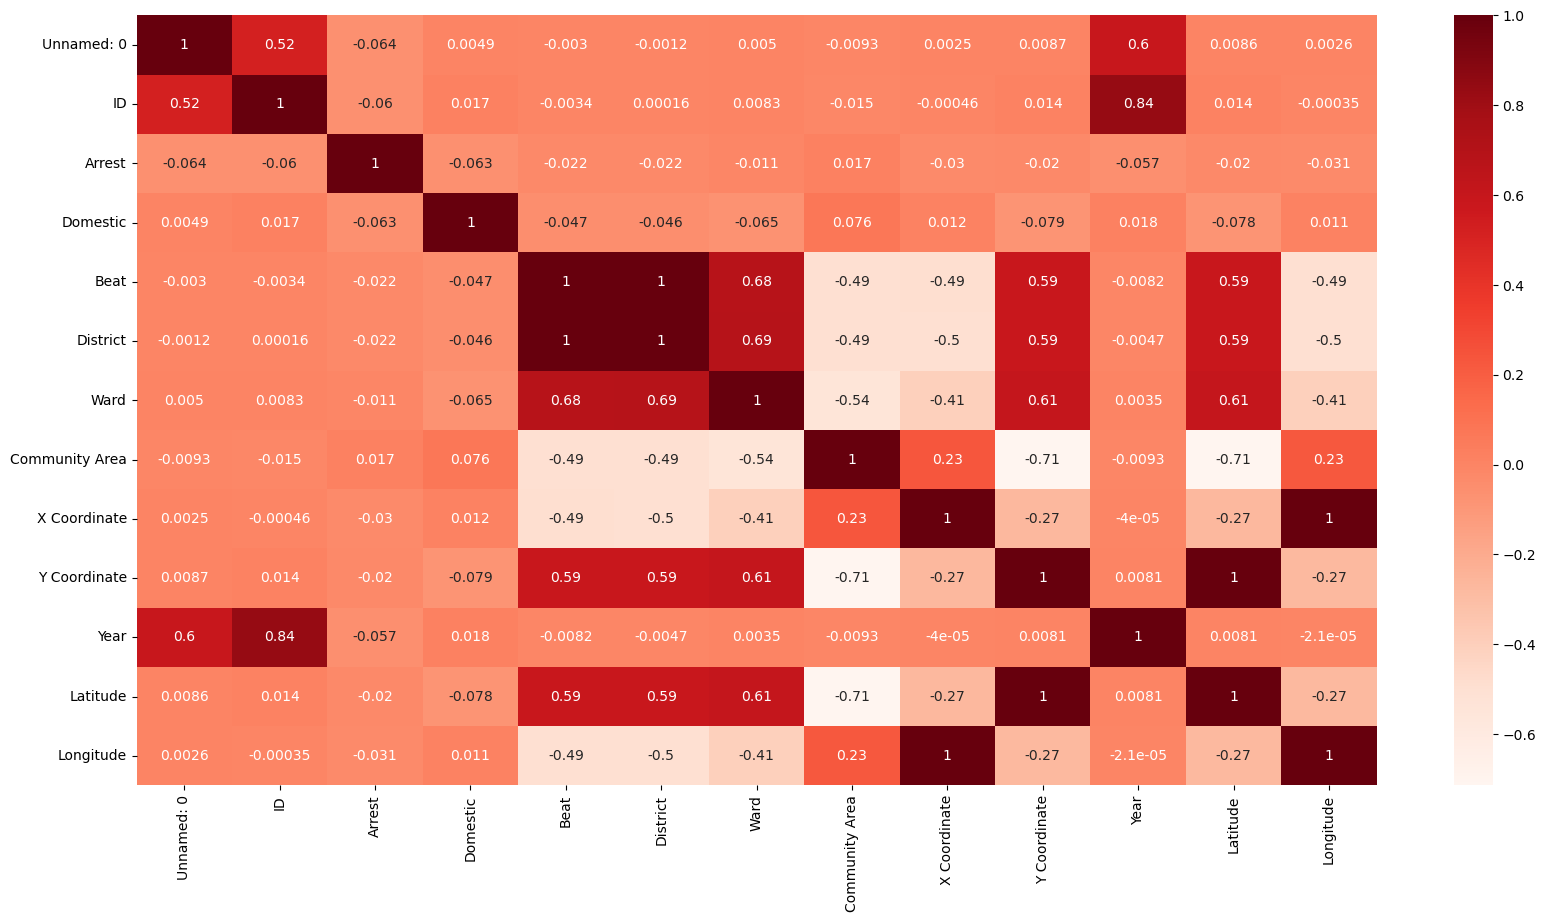

In [14]:
X_fs = data.drop(['Primary Type'], axis=1)
Y_fs = data['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
# Get the value counts of each unique location description
location_counts = data['Location Description'].value_counts()
print(location_counts)


STREET                330471
RESIDENCE             233530
APARTMENT             185023
SIDEWALK              160891
OTHER                  55774
                       ...  
CLUB                       1
CTA "L" PLATFORM           1
GARAGE/AUTO REPAIR         1
CHURCH PROPERTY            1
LAGOON                     1
Name: Location Description, Length: 142, dtype: int64


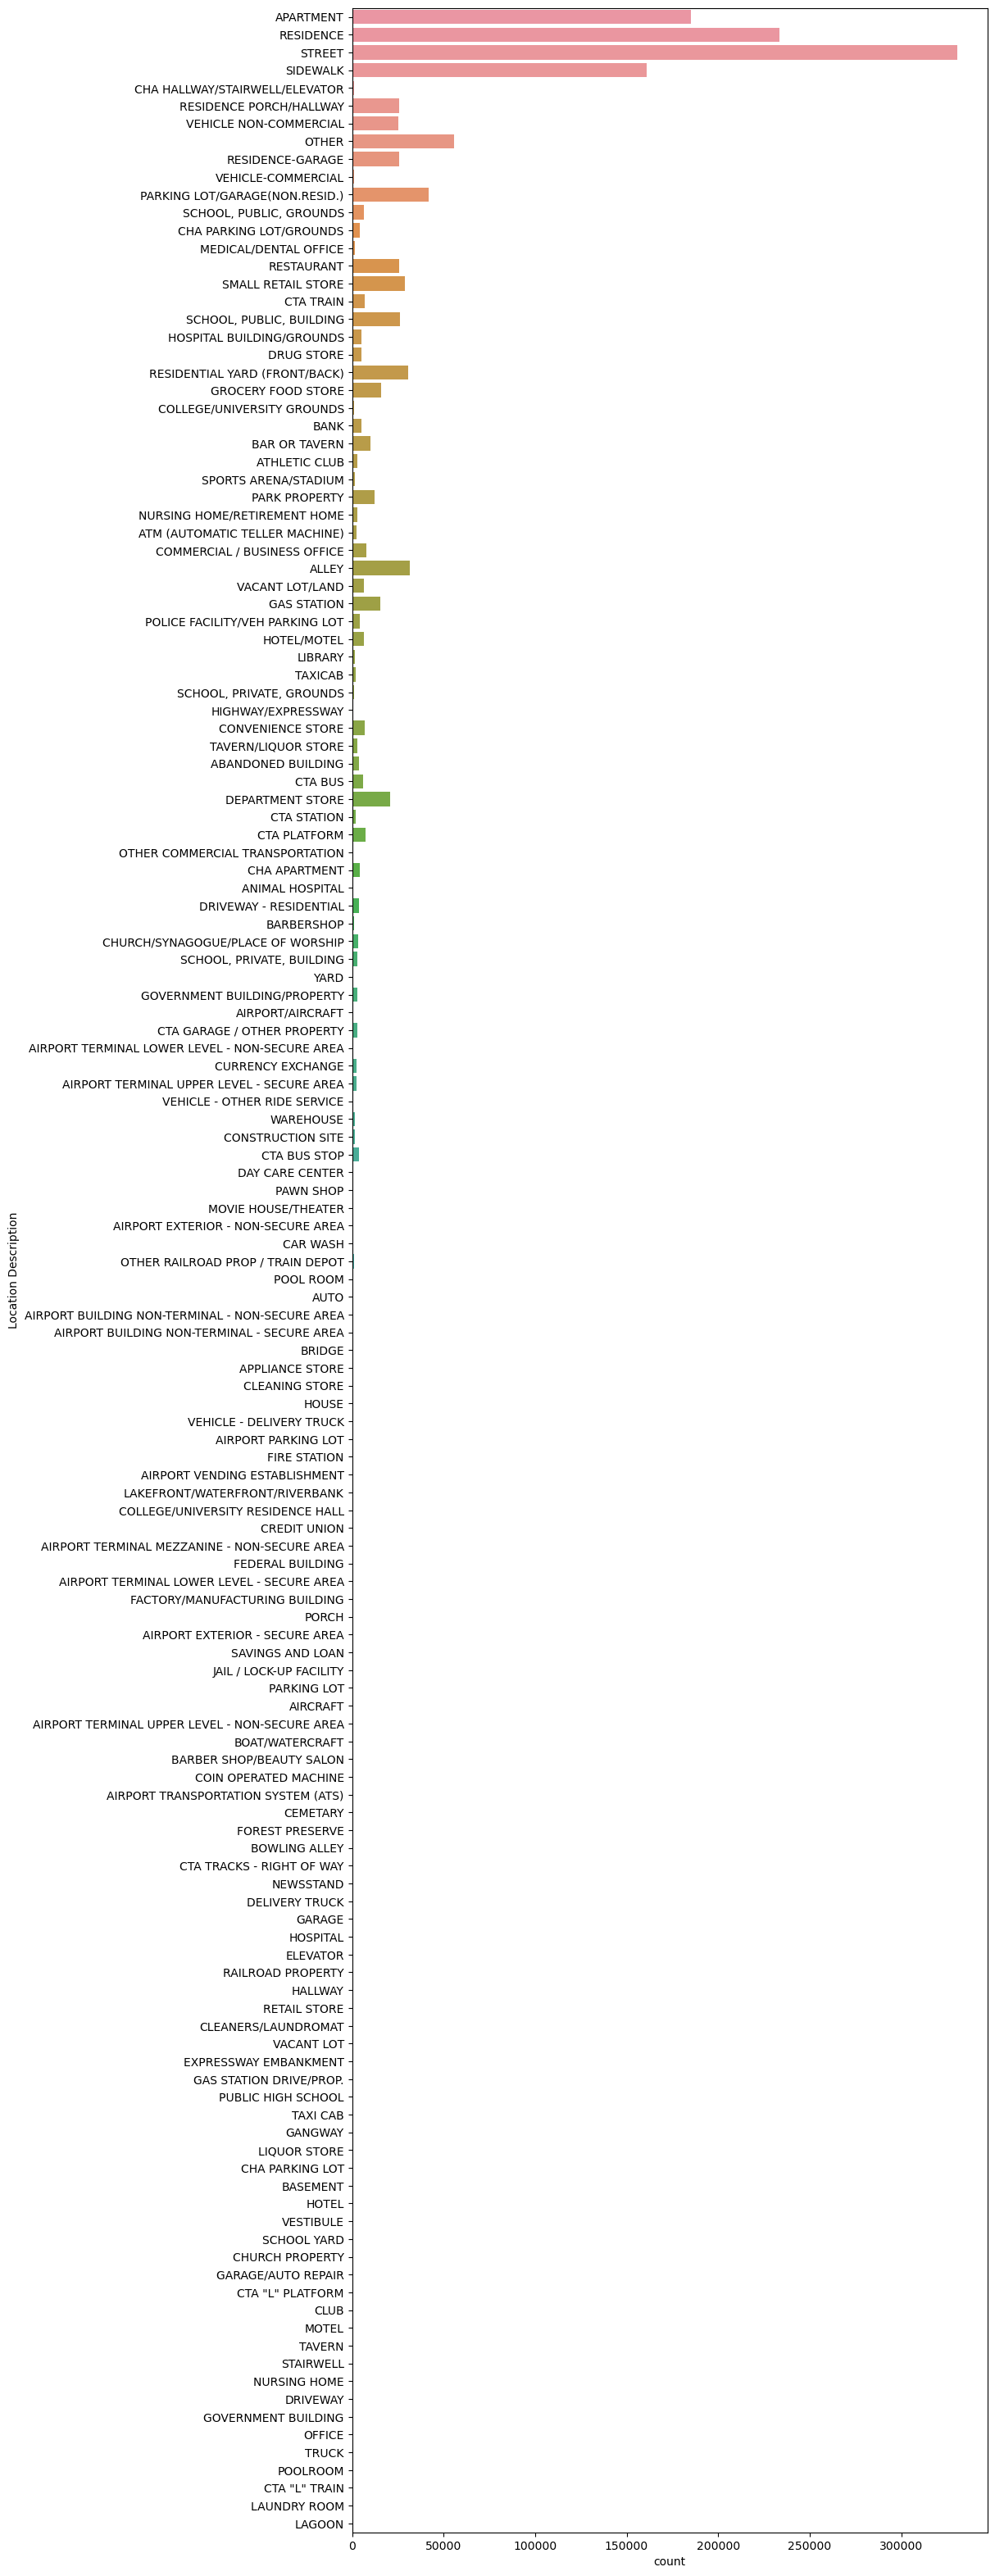

In [16]:
plt.figure(figsize=(10, 40))  # Adjust the size as per your needs
sns.countplot(data=data, y="Location Description")
plt.show()

In [17]:
order_loc = data['Location Description'].value_counts().iloc[:15].index


<Axes: xlabel='count', ylabel='Location Description'>

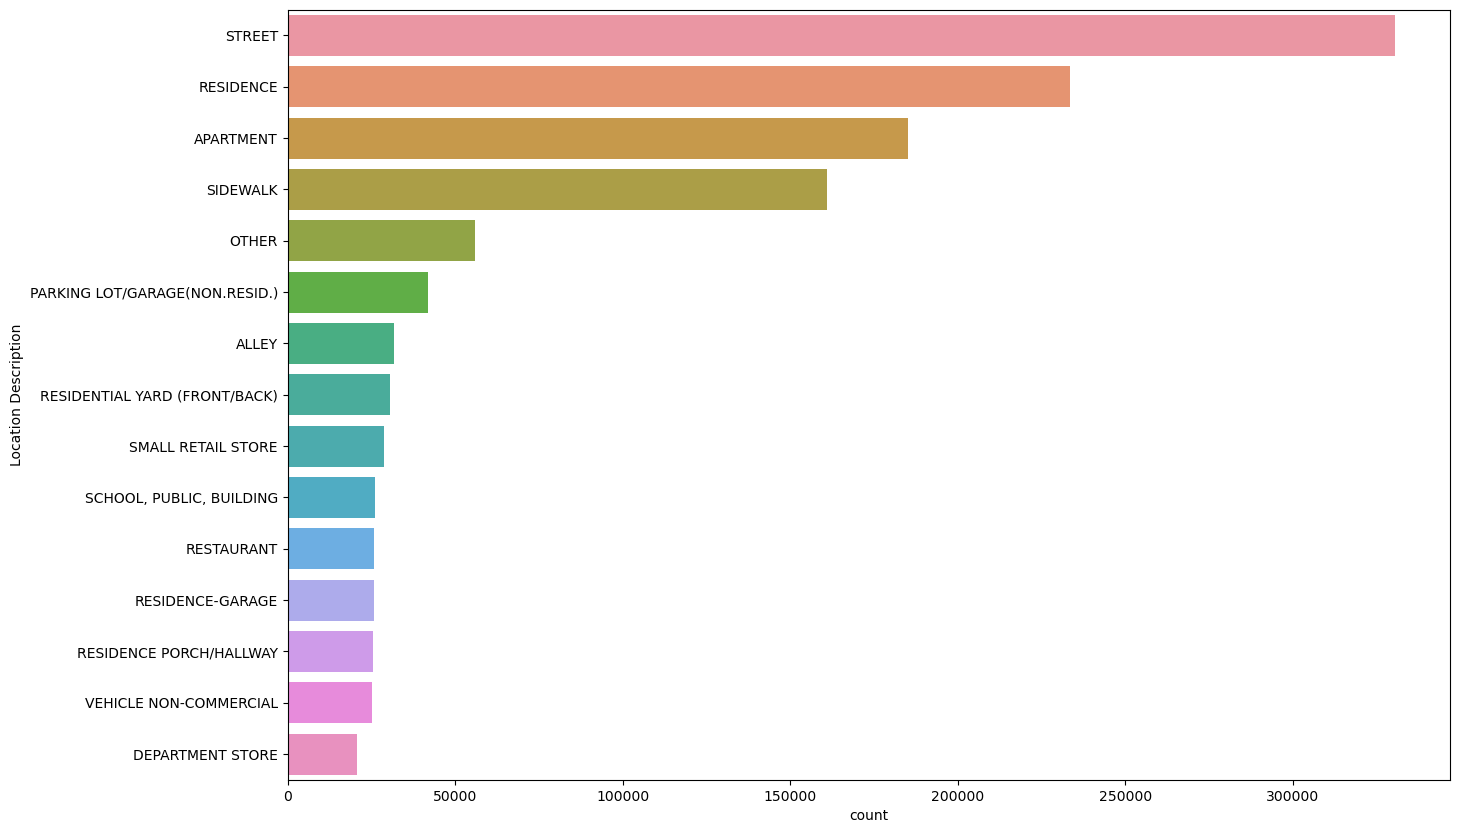

In [18]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Location Description', data = data, order = order_loc)

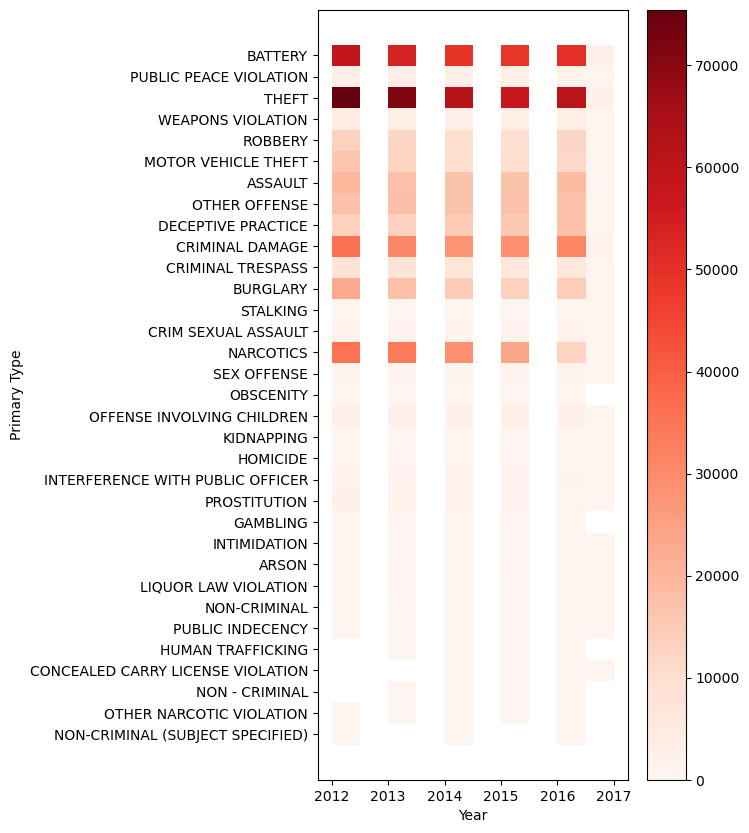

In [19]:
plt.figure(figsize = (5,10))
sns.histplot(data=data, x='Year', y='Primary Type', bins=50, cbar=True, cmap='Reds', binwidth=0.5)
plt.show()




In [20]:
data.isna().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [21]:
data.fillna(0,inplace=True)
data.isna().sum()


Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

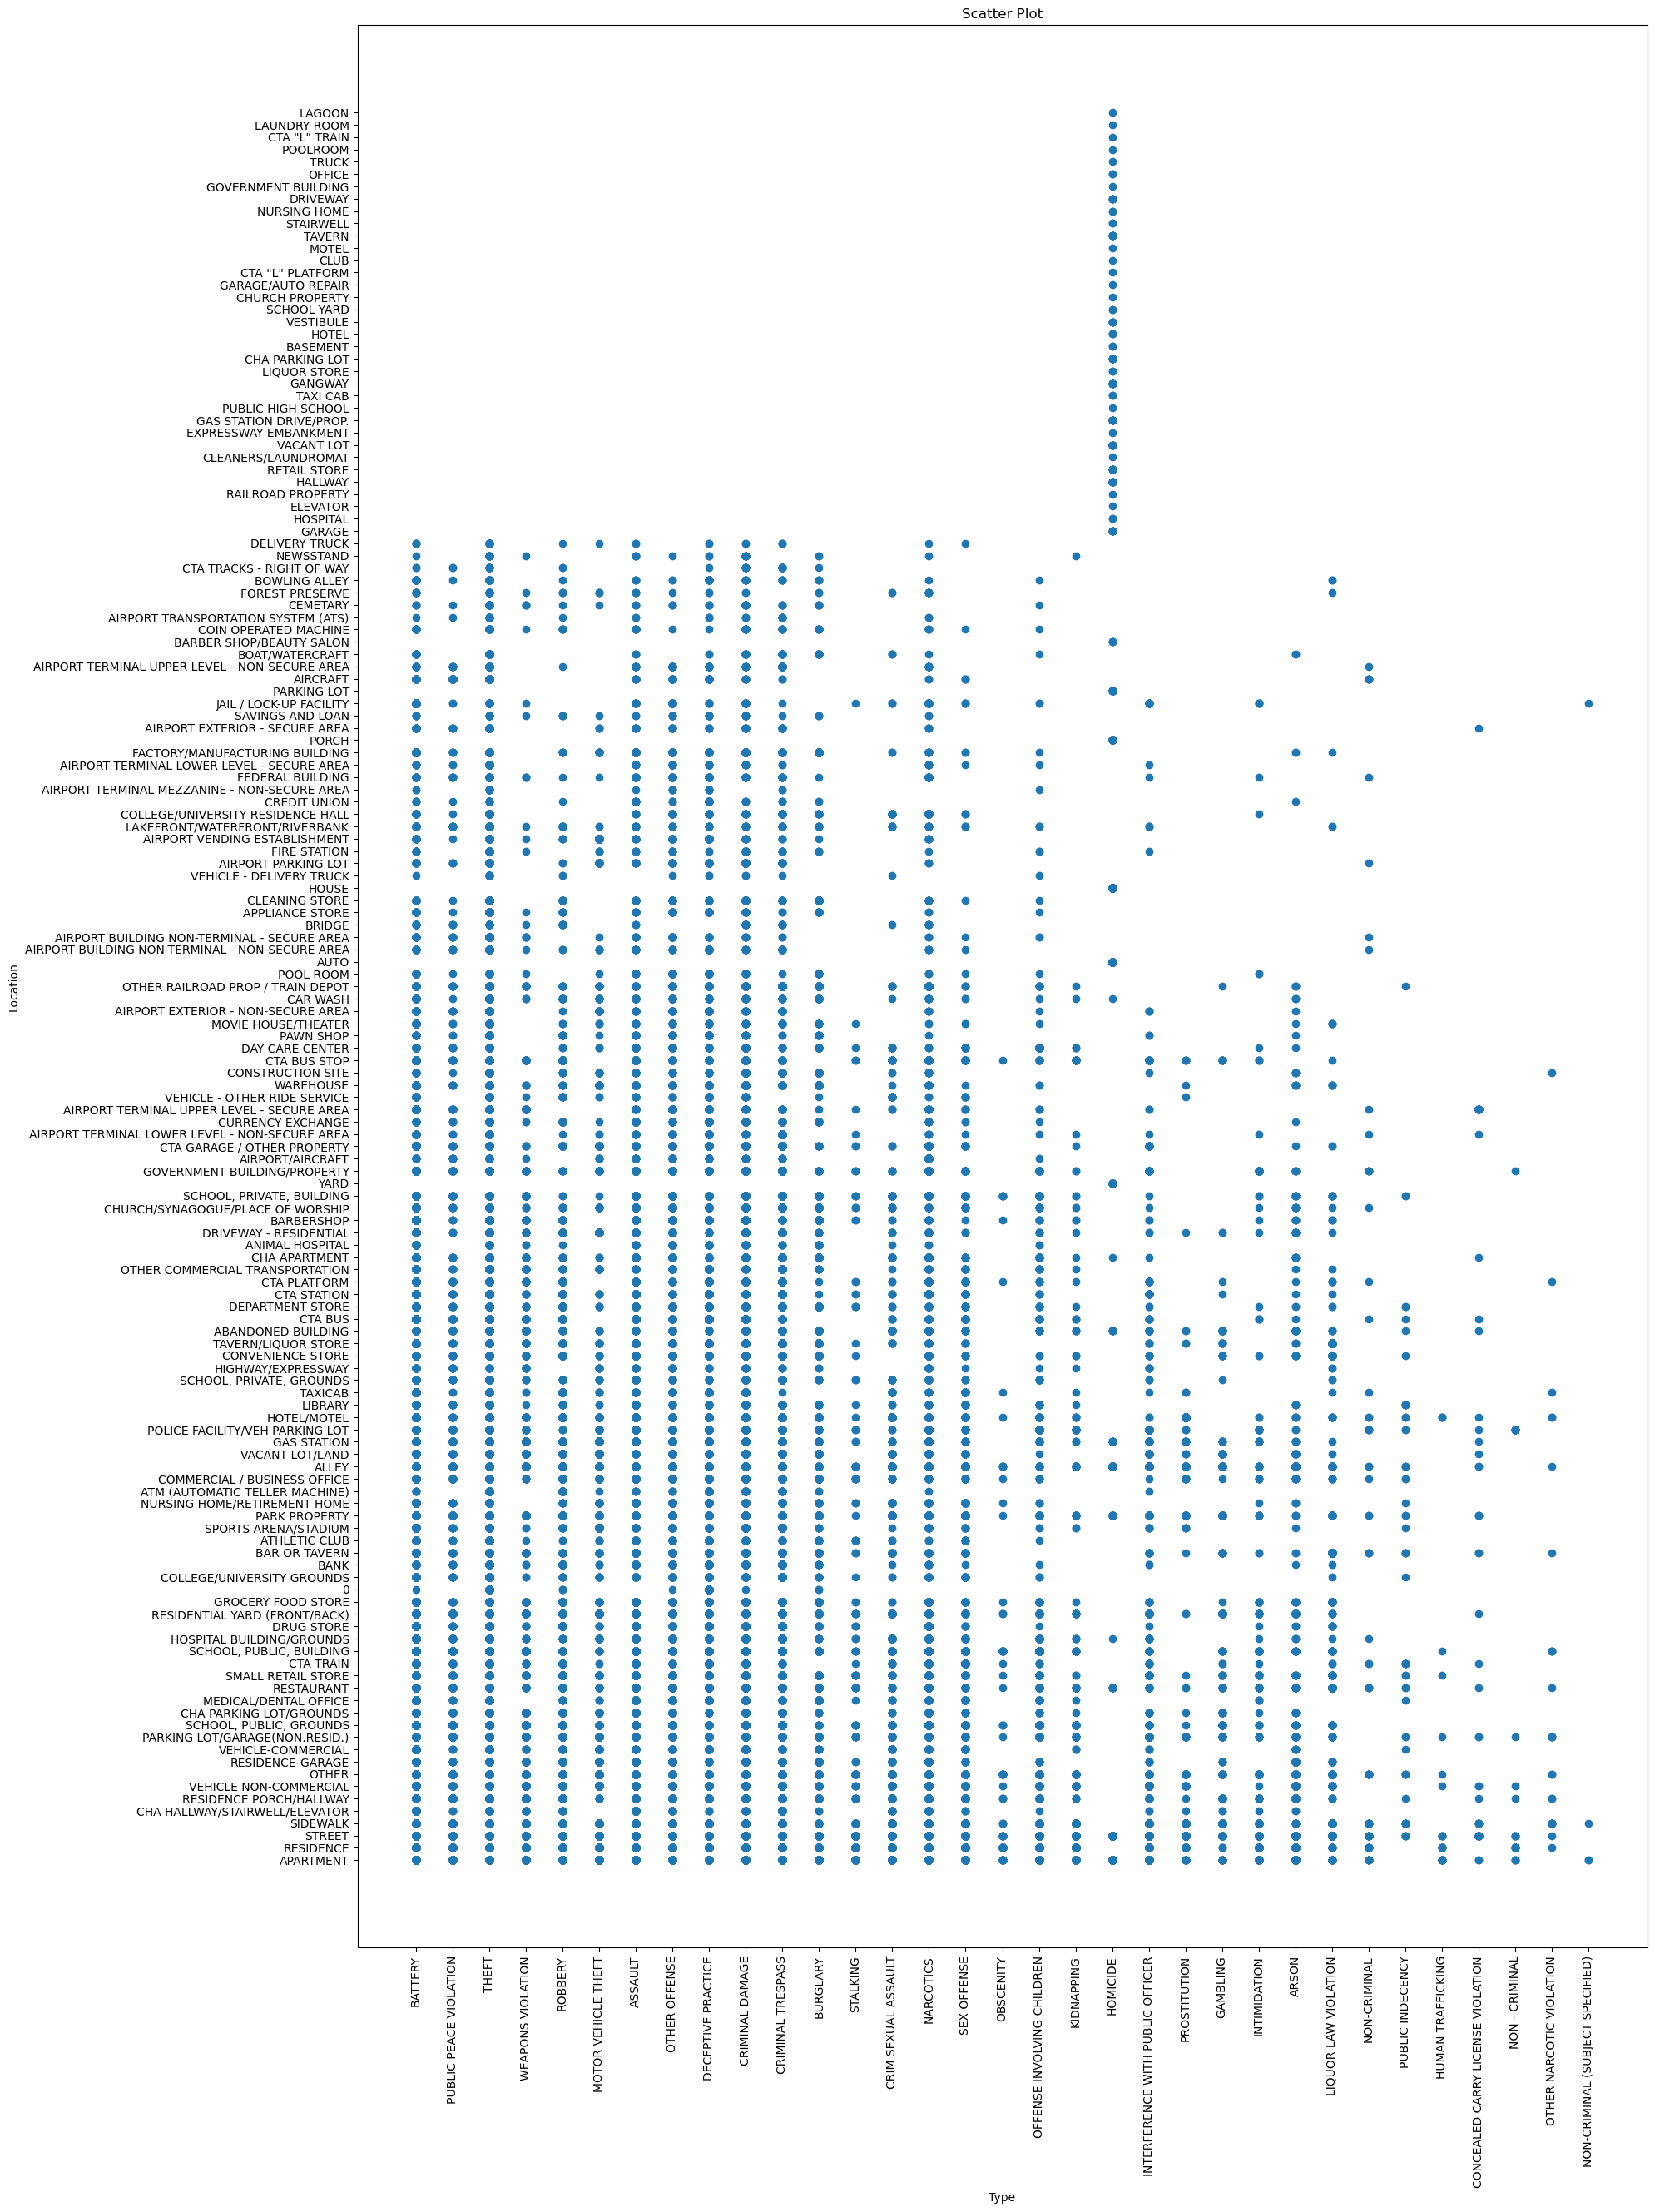

In [22]:

x = data['Primary Type'].astype(str)
y = data['Location Description'].astype(str)
plt.figure(figsize = (20,30))

plt.scatter(x, y)

plt.xlabel('Type')
plt.ylabel('Location')
plt.xticks(rotation='vertical')
plt.title('Scatter Plot')

plt.show()


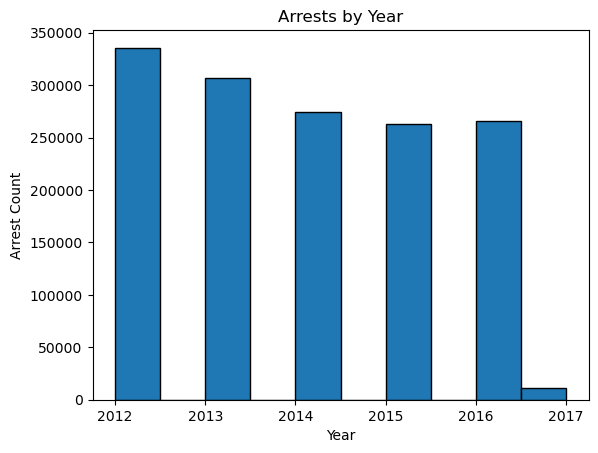

In [23]:
years = data['Year']
arrests = data['Arrest']

plt.hist(years, bins=10, edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Arrest Count')
plt.title('Arrests by Year')

plt.show()


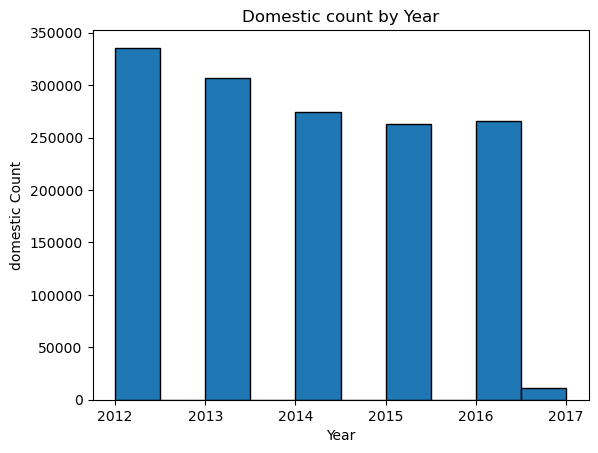

In [24]:
years = data['Year']
domestic = data['Domestic']

plt.hist(years, bins=10, edgecolor='black')

plt.xlabel('Year')
plt.ylabel('domestic Count')
plt.title('Domestic count by Year')

plt.show()


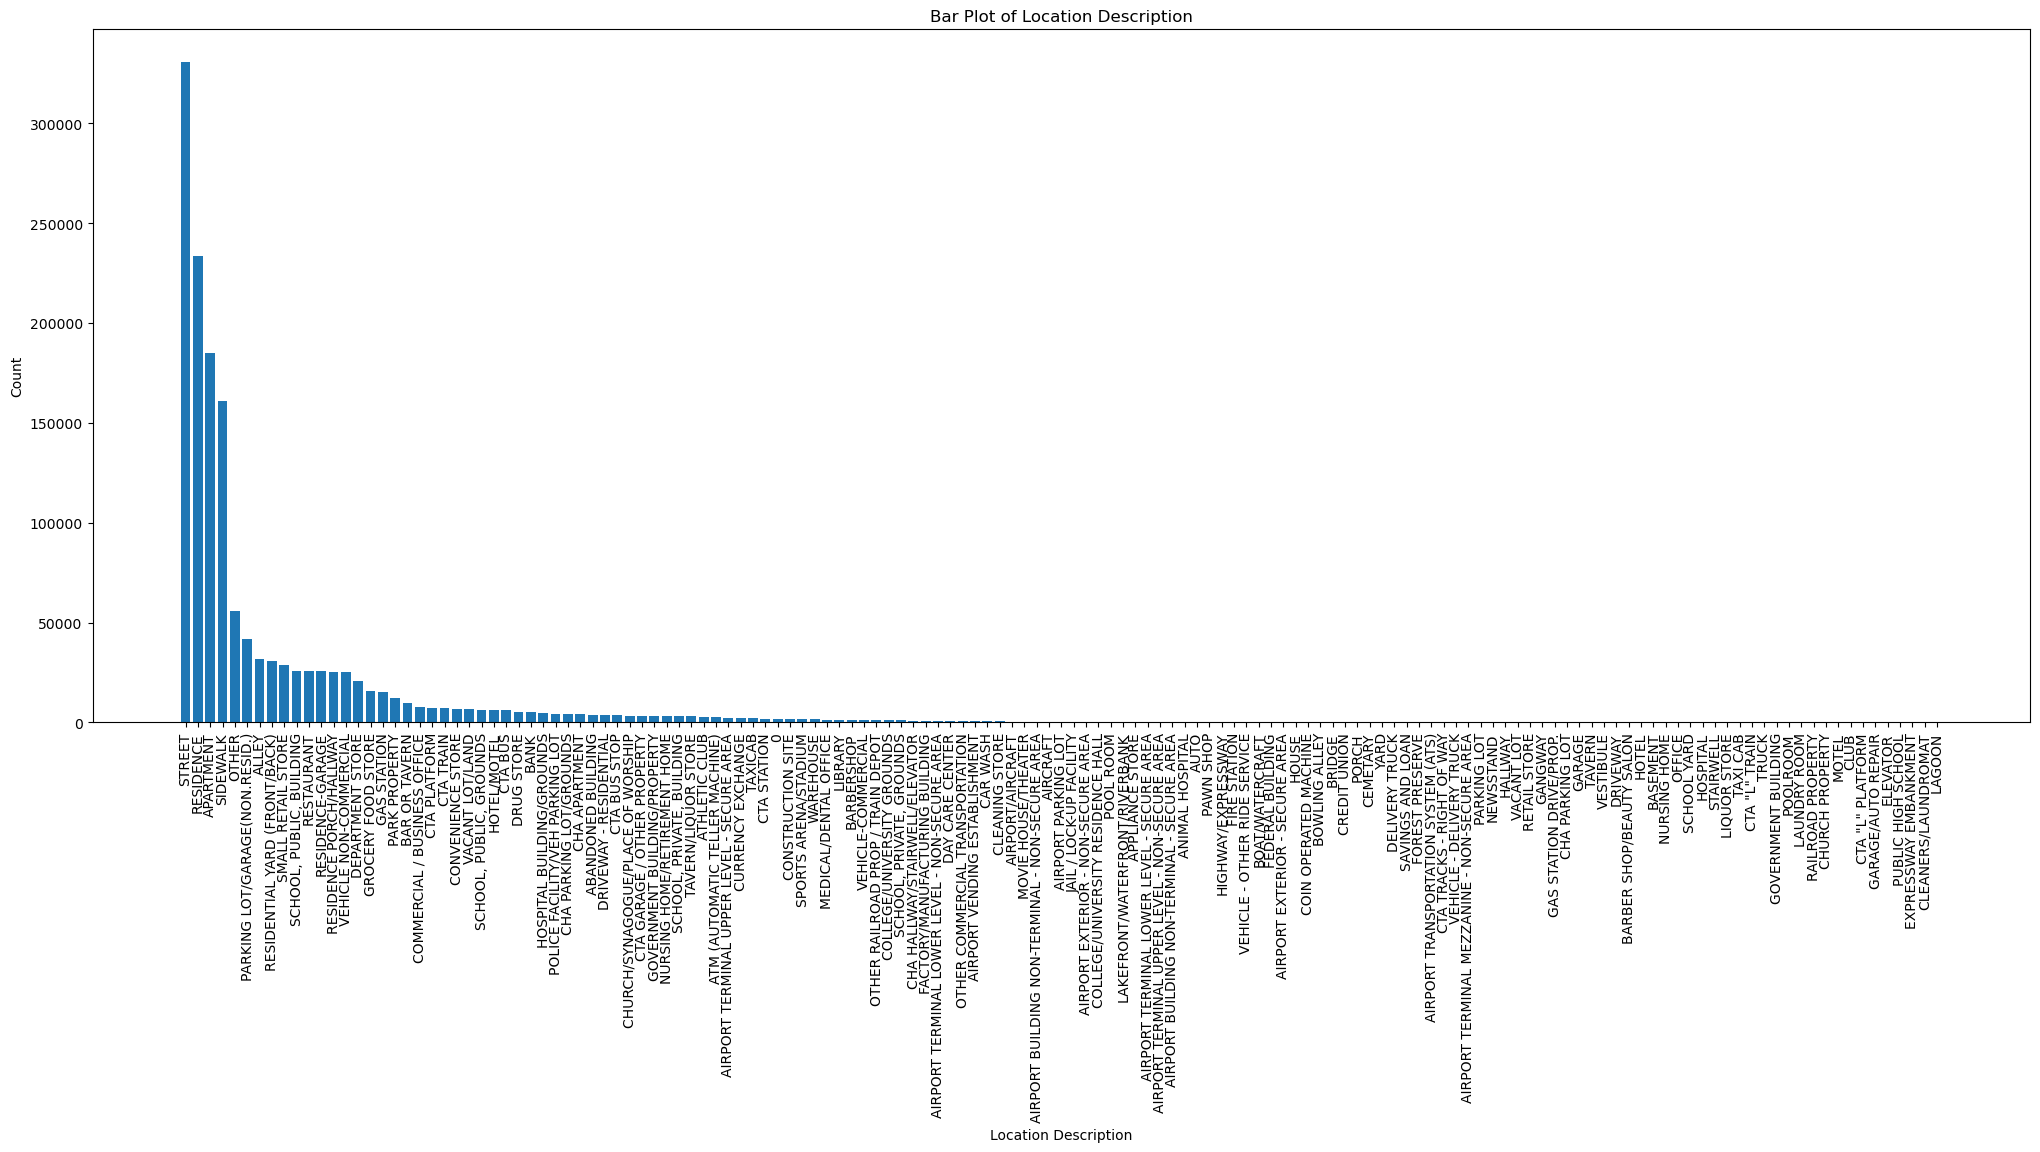

In [25]:

location_counts = data['Location Description'].value_counts()
location_labels = location_counts.index.astype(str)

plt.figure(figsize=(25, 9))

plt.bar(location_labels, location_counts)

plt.xlabel('Location Description')
plt.ylabel('Count')
plt.title('Bar Plot of Location Description')
plt.xticks(rotation='vertical')

plt.show()


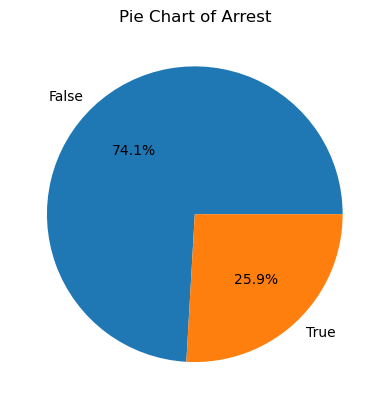

In [26]:

arrest_counts = data['Arrest'].value_counts()
plt.pie(arrest_counts, labels=arrest_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Arrest')

plt.show()


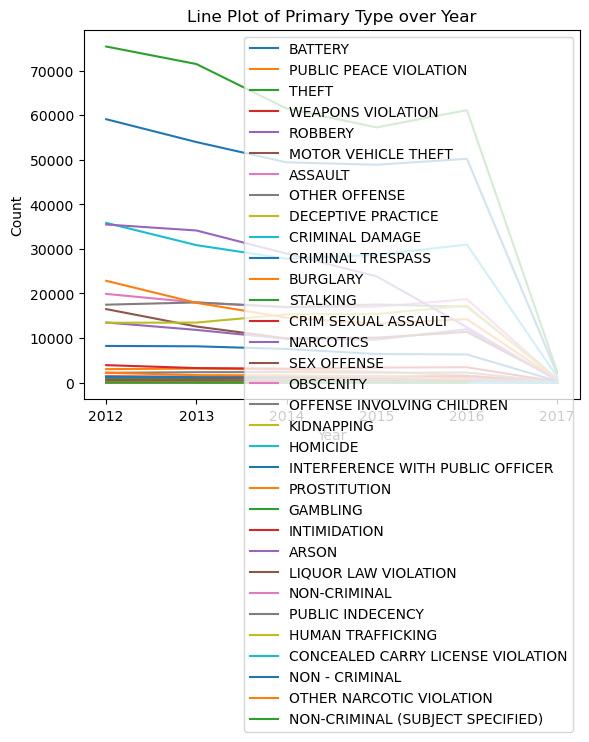

In [27]:
type_counts_by_year = data.groupby('Year')['Primary Type'].value_counts()

for crime_type in data['Primary Type'].unique():
    plt.plot(type_counts_by_year.loc[:, crime_type], label=crime_type)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Line Plot of Primary Type over Year')
plt.legend()

plt.show()


# Prediction + Analysis

In [28]:

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from sklearn.metrics import classification_report as cr


In [29]:
data.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [30]:
#NO null values Removal of null values not requried also no outliers were detected from the above EDA so no outlier removal also needed!

In [31]:
data.head(20)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
5,1108,10508702,HZ250447,05/03/2016 10:35:00 PM,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,8.0,44.0,04B,1183336.0,1850642.0,2016,05/10/2016 03:56:50 PM,41.745354,-87.603799,"(41.745354023, -87.603798903)"
6,1130,10508703,HZ250489,05/03/2016 10:30:00 PM,027XX S STATE ST,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,...,3.0,35.0,08B,1176730.0,1886544.0,2016,05/10/2016 03:56:50 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
7,1801,10508704,HZ250514,05/03/2016 09:30:00 PM,002XX E 46TH ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,...,3.0,38.0,08B,1178514.0,1874573.0,2016,05/10/2016 03:56:50 PM,41.811134,-87.620741,"(41.811133958, -87.62074077)"
8,1868,10508709,HZ250523,05/03/2016 04:00:00 PM,014XX W DEVON AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,...,40.0,1.0,08B,1165696.0,1942616.0,2016,05/10/2016 03:56:50 PM,41.998131,-87.665814,"(41.99813061, -87.665814038)"
9,1891,10508982,HZ250667,05/03/2016 10:30:00 PM,069XX S ASHLAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,...,17.0,67.0,08B,1166876.0,1858796.0,2016,05/10/2016 03:56:50 PM,41.768097,-87.663879,"(41.768096835, -87.663878589)"


In [32]:
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


In [33]:
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(['ID'], axis=1)
data = data.drop(['Case Number'], axis=1) 

In [34]:
# data['date2'] = pd.to_datetime(data['Date'])
# data['Year'] = data['date2'].dt.year
# data['Month'] = data['date2'].dt.month
# data['Day'] = data['date2'].dt.day
# data['Hour'] = data['date2'].dt.hour
# data['Minute'] = data['date2'].dt.minute
# data['Second'] = data['date2'].dt.second 
# data = data.drop(['Date'], axis=1) 
# data = data.drop(['date2'], axis=1) 
# data = data.drop(['Updated On'], axis=1)
data.head()


,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [35]:
data['Primary Type'] = pd.factorize(data["Primary Type"])[0] 
unique = data['Primary Type'].unique()


In [36]:
data['Block'] = pd.factorize(data["Block"])[0]
data['IUCR'] = pd.factorize(data["IUCR"])[0]
data['Description'] = pd.factorize(data["Description"])[0]
data['Location Description'] = pd.factorize(data["Location Description"])[0]
data['FBI Code'] = pd.factorize(data["FBI Code"])[0]
data['Location'] = pd.factorize(data["Location"])[0]


In [37]:
Target = 'Primary Type'
x, y = train_test_split(data, 
                        test_size = 0.8, 
                        train_size = 0.2, 
                        random_state= 30)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code']
Target Class        :  Primary Type
Training Set Size   :  (291342, 20)
Test Set Size       :  (1165372, 20)


## Modelling of Data-Set

In [38]:
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])


In [39]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

C:\Users\hamma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== Random Forest Results ==========
Accuracy    :  0.9985789945184885
Recall      :  0.9985789945184885
Precision   :  0.998213075826927
F1 Score    :  0.9985789945184885
Confusion Matrix: 
[[210858      0     28 ...      0      0      0]
 [     0  10336    117 ...      0      0      0]
 [     0      0 263495 ...      0      0      0]
 ...
 [     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      0]]


In [40]:
data.head(10)


,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,05/03/2016 11:40:00 PM,0,0,0,0,0,True,True,1022,10.0,24.0,29.0,0,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,0
1,05/03/2016 09:40:00 PM,1,0,0,0,1,False,True,313,3.0,20.0,42.0,0,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,1
2,05/03/2016 11:31:00 PM,2,1,1,1,2,False,False,1524,15.0,37.0,25.0,1,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,2
3,05/03/2016 10:10:00 PM,3,2,0,2,3,False,False,1532,15.0,28.0,25.0,0,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,3
4,05/03/2016 10:00:00 PM,4,3,2,3,1,False,True,1523,15.0,28.0,25.0,2,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,4
5,05/03/2016 10:35:00 PM,5,4,0,4,2,False,False,631,6.0,8.0,44.0,3,1183336.0,1850642.0,2016,05/10/2016 03:56:50 PM,41.745354,-87.603799,5
6,05/03/2016 10:30:00 PM,6,2,0,2,4,False,False,133,1.0,3.0,35.0,0,1176730.0,1886544.0,2016,05/10/2016 03:56:50 PM,41.844024,-87.626923,6
7,05/03/2016 09:30:00 PM,7,2,0,2,5,False,False,215,2.0,3.0,38.0,0,1178514.0,1874573.0,2016,05/10/2016 03:56:50 PM,41.811134,-87.620741,7
8,05/03/2016 04:00:00 PM,8,2,0,2,3,False,False,2432,24.0,40.0,1.0,0,1165696.0,1942616.0,2016,05/10/2016 03:56:50 PM,41.998131,-87.665814,8
9,05/03/2016 10:30:00 PM,9,0,0,0,2,False,True,735,7.0,17.0,67.0,0,1166876.0,1858796.0,2016,05/10/2016 03:56:50 PM,41.768097,-87.663879,9


In [41]:
array = [[2, 3, 2]]

print(array)
predictions = rf_model.predict(array)
print(predictions)

[[2, 3, 2]]
[2]


C:\Users\hamma\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:

nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=10,
                         max_iter=200                         
                        )
nn_model.fit(X=x1,
             y=x2)


result = nn_model.predict(y[Features]) 

In [43]:

ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

C:\Users\hamma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


========== Neural Network Results ==========
Accuracy    :  0.9819731381910669
Recall      :  0.9819731381910669
Precision   :  0.9828099462284179
F1 Score    :  0.9819731381910669
Confusion Matrix: 
[[210886      0      0 ...      0      0      0]
 [     0   9516      0 ...      0      0      7]
 [     0      0 263495 ...      0      0      0]
 ...
 [     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      2]]


In [51]:
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y[Features]) 

In [54]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average='weighted', zero_division=1.0)

f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

In [50]:
#This model couldnt run because the precision value got below 0.

In [57]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X=x1, y=x2)
result = clf.predict(y[Features]) 

C:\Users\hamma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# POWERBI VISUALIZATIONS

In [58]:
!pip install powerbiclient

In [59]:
from powerbiclient import Report, models

In [60]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication
device_auth = DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code SHNJ5ZJDW to authenticate.

Device flow authentication successfully completed.
You are now logged in .

The result should be passed only to trusted code in your notebook.


In [61]:
group_id="Workspace ID"
report_id="Report ID"

In [62]:
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)

report

Exception: Could not get embed URL: Get embed URL failed with status code 401

MovieWriter imagemagick unavailable; using Pillow instead.


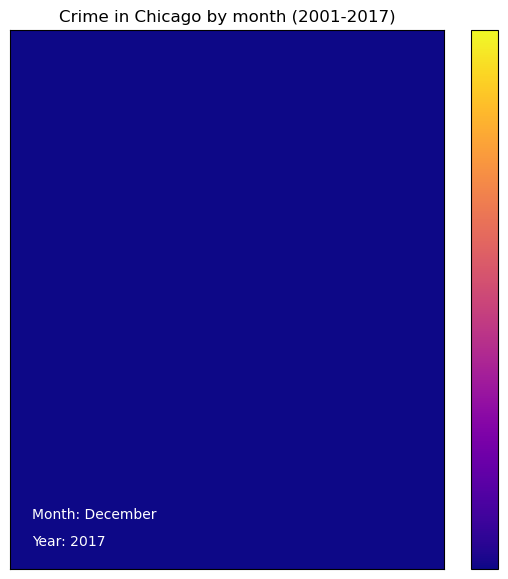

In [65]:
from math import isnan
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy.ndimage as ndimage

from matplotlib import animation, rc

# load the data 
df = pd.read_csv("crime.csv") # there are some errors in the csv




# convert date strings to (year,month) pairs
locations = df.loc[:,["Date","Latitude","Longitude"]]
dates_as_strings = locations.loc[:,"Date"].values
dates_as_datetime = [ datetime.strptime(string, "%m/%d/%Y %H:%M:%S %p") for string in dates_as_strings ]
months = [ (date.year,date.month) for date in dates_as_datetime ]
locations["Month"] = pd.Series(months, index = df.index)
locations.drop(["Date"], axis=1)

# fix types
locations[["Latitude","Longitude"]] = locations[["Latitude","Longitude"]].apply(pd.to_numeric, errors='coerce')
locations = locations.dropna(how='any') # drop crimes with nan lat-long

# let's select crimes with lat-long in the box (41.6,-87.9) to (42.1,-87.4)
# convert lat-long to pixel indices
locations["Latitude"] = (200*(locations["Latitude"] -41.6)).astype(np.int8)
locations["Longitude"] = (200*(locations['Longitude'] + 87.9)).astype(np.int8)

# in the resolution we chose, chicago is contained in the box with corners (0,0) and (100,100)
index_list = np.concatenate((locations[0 > locations.Latitude].index,
                             locations[locations.Latitude > 99].index,
                             locations[0 > locations.Longitude].index,
                             locations[locations.Longitude > 99].index))
                             
try: 
    locations = locations.drop(index_list)
except KeyError:
    pass

A = np.zeros((204,100,100)) # array to hold counts of crimes by month and location during 2001-2004

for i in range(0,204):  # there are ≈ 2 million entries in locations so this will take a little while
    year_month = (int(2001+i/12),1+i%12)
    month = locations.loc[locations['Month'] == year_month]
    
    for _, row in month.iterrows():
        A[i,row['Latitude'],row['Longitude']] += 1
        
# create the animated plot
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
fig, ax = plt.subplots(figsize =(7,7))

plt.title('Crime in Chicago by month (2001-2017)')
im = ndimage.gaussian_filter(A[0], sigma=.9, order=0) # add smoothing 
heatmap = ax.pcolor(im,cmap='plasma',vmin=0, vmax=200)
y = ax.text(5, 5, "Year: %i"%2001, ha="left", va="center", color="w")
m = ax.text(5, 10, "Month: %s"%months[0], ha="left", va="center", color="w")
plt.colorbar(heatmap,ticks=[])

ax.set_yticks([])
ax.set_xticks([])

def draw_frame(i):
    im = ndimage.gaussian_filter(A[i], sigma=.9, order=0) # add smoothing
    heatmap = ax.pcolor(im,cmap='plasma',vmin=0, vmax=200)
    y.set_text("Year: %i"%(2001+int(i/12)))
    m.set_text("Month: %s"%months[i%12])
    return heatmap,
    
anim = animation.FuncAnimation(fig, draw_frame, frames=204, interval=20, blit=True)

anim.save('anim.gif', writer='imagemagick', fps=1.9)

plt.show()